In [305]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

df = pd.read_csv('schools_complete.csv')
df = pd.read_csv('students_complete.csv')

In [306]:
school_data_to_load = Path('schools_complete.csv')
student_data_to_load = Path('students_complete.csv')
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()



,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [307]:
sdc = school_data_complete
grp = sdc.groupby("school_name")
sc = sdc.student_name.count()

## District Summary

In [308]:
def calculate_math_percentage():
    return passing_math_count / float(sc) * 100

In [309]:
def calculate_reading_percentage():
    return passing_reading_count / float(sc) * 100

In [310]:
def passing_math_reading_count():
    return passing_math_reading_count /  float(sc) * 100

In [311]:
total_students = df['Student ID'].nunique()
average_math_score = df['math_score'].mean()
average_reading_score = df['reading_score'].mean()

passing_math_reading_count = ((df['math_score'] >= 70) & (df['reading_score'] >= 70)).mean() * 100

pd.DataFrame({
    'Total Schools': sdc.school_name.nunique(),
    'Total Students': f'{sdc.student_name.count():,}',
    'Total Budget': f'${grp.budget.max().sum():,.2f}',
    'Average Math Score': sdc.math_score.mean(),
    'Average Reading Score': sdc.reading_score.mean(),
    '% Passing Math': calculate_math_percentage(),
    '% Passing Reading': calculate_reading_percentage(),
    '% Overall Passing': passing_math_reading_count
},[0])


,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [312]:
sdc

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [322]:
pd.DataFrame({
    'School Type': sdc.groupby('school_name')['type'].first().reset_index(drop=True),
    'Total Students': f'{sdc.student_name.count():,}',
    'Total School Budget': 
    'Per Student Budget':
    'Average Math Score': sdc.math_score.mean(),
    'Average Reading Score': sdc.reading_score.mean(),
    '% Passing Math': passing_math_per_school,
    '% Passing Reading': passing_reading_per_school,
    '% Overall Passing': overall_passing_per_school
})

,School Type,Total Students,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,District,"39,170",78.985371,81.87784,66.680064,81.933280,54.642283
1,Charter,"39,170",78.985371,81.87784,94.133477,97.039828,91.334769
2,District,"39,170",78.985371,81.87784,65.988471,80.739234,53.204476
3,District,"39,170",78.985371,81.87784,68.309602,79.299014,54.289887
4,Charter,"39,170",78.985371,81.87784,93.392371,97.138965,90.599455
5,District,"39,170",78.985371,81.87784,66.752967,80.862999,53.527508
6,Charter,"39,170",78.985371,81.87784,92.505855,96.252927,89.227166
7,District,"39,170",78.985371,81.87784,65.683922,81.316421,53.513884
8,District,"39,170",78.985371,81.87784,66.057551,81.222432,53.539172
9,Charter,"39,170",78.985371,81.87784,94.594595,95.945946,90.540541


In [314]:
school_summary['Total School Budget'] = school_group['math_score'].count()

df['Per Student Budget'] = school_summary['Total School Budget'] / df.groupby('school_name')['Student ID'].transform('nunique')

top_schools = school_summary.sort_values(by='% Overall Passing', ascending=False).head(5)

bottom_schools = school_summary.sort_values(by='% Overall Passing').head(5)

math_scores_by_grade = df.pivot_table(index='school_name', columns='grade', values='math_score', aggfunc='mean')

reading_scores_by_grade = df.pivot_table(index='school_name', columns='grade', values='reading_score', aggfunc='mean')

df['Spending Ranges (Per Student)'] = pd.cut(df['Per Student Budget'], bins=[0, 585, 630, 645, 680], labels=["<$585", "$585-630", "$630-645", "$645-680"])

school_spending_df = df.groupby('Spending Ranges (Per Student)')

spending_summary = pd.DataFrame({
    'Average Math Score': school_spending_df['math_score'].mean(),
    'Average Reading Score': school_spending_df['reading_score'].mean(),
    '% Passing Math': (school_spending_df['math_score'].apply(lambda x: (x >= 70).mean()) * 100).reset_index(drop=True),
    '% Passing Reading': (school_spending_df['reading_score'].apply(lambda x: (x >= 70).mean()) * 100).reset_index(drop=True),
    '% Overall Passing': (school_spending_df.apply(lambda x: ((x['math_score'] >= 70) & (x['reading_score'] >= 70)).mean()) * 100).reset_index(drop=True)
})


In [315]:
df['School Size'] = pd.cut(df.groupby('school_name')['Student ID'].transform('nunique'), bins=[0, 1000, 2000, 5000], labels=["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"])

df['math_pass'] = df['math_score'] >= 70
df['reading_pass'] = df['reading_score'] >= 70
df['overall_pass'] = (df['math_pass'] & df['reading_pass'])

size_summary = df.groupby('School Size').agg({
    'math_score': 'mean',
    'reading_score': 'mean',
    'math_pass': 'mean',
    'reading_pass': 'mean',
    'overall_pass': 'mean'
})

size_summary.columns = ['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']

type_summary = df.groupby('school_name').agg({
    'math_score': 'mean',
    'reading_score': 'mean',
    'math_pass': 'mean',
    'reading_pass': 'mean',
    'overall_pass': 'mean'
})

type_summary.columns = ['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']

df.drop(['math_pass', 'reading_pass', 'overall_pass'], axis=1, inplace=True)


In [316]:
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
$585-630,NaN,NaN,NaN,NaN,NaN
$630-645,NaN,NaN,NaN,NaN,NaN
$645-680,NaN,NaN,NaN,NaN,NaN
<$585,NaN,NaN,NaN,NaN,NaN


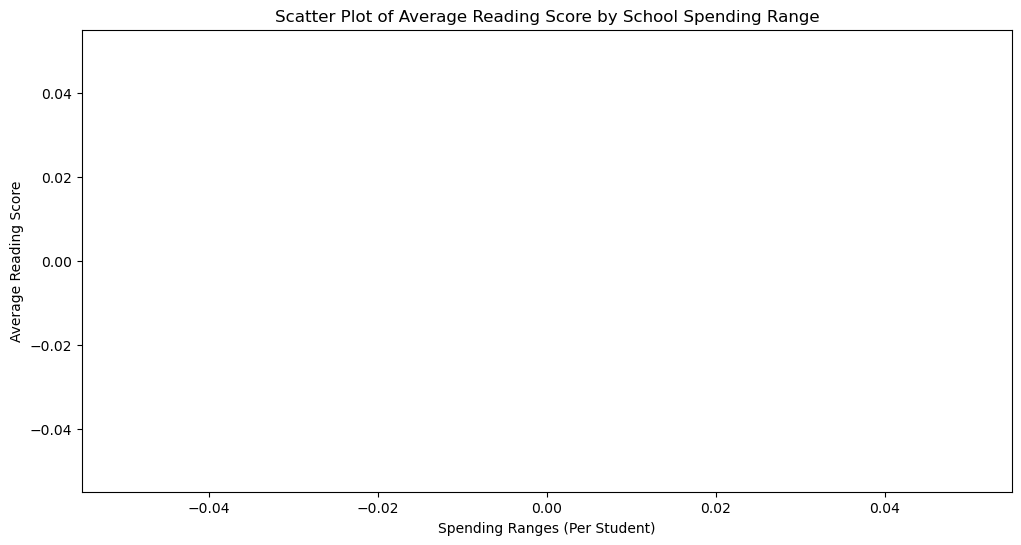

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(spending_summary['Average Math Score'], spending_summary['Average Reading Score'])

for index, row in spending_summary.iterrows():
    plt.annotate(index, (row['Average Math Score'], row['Average Reading Score']), xytext=(5,-5), textcoords='offset points')

# plt.xlim(0, 40000000)
# plt.ylim(0, 100)

plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('Average Reading Score')
plt.title('Scatter Plot of Average Reading Score by School Spending Range')

plt.show()
